In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importing the data set
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
print(df)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
0           1    

In [3]:
print(df.head())
print('--------------------------------------------------------')
print(df.tail())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
--------------------------------------------------------
     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120            

In [4]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
# Grouping by University ranking 
df_university = df.groupby(by = 'University Rating').mean()
df_university

,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,,
1,281.558824,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,249.555556,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,247.574074,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,275.809524,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,207.753425,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001600F96D9C8>,
      dtype=object)

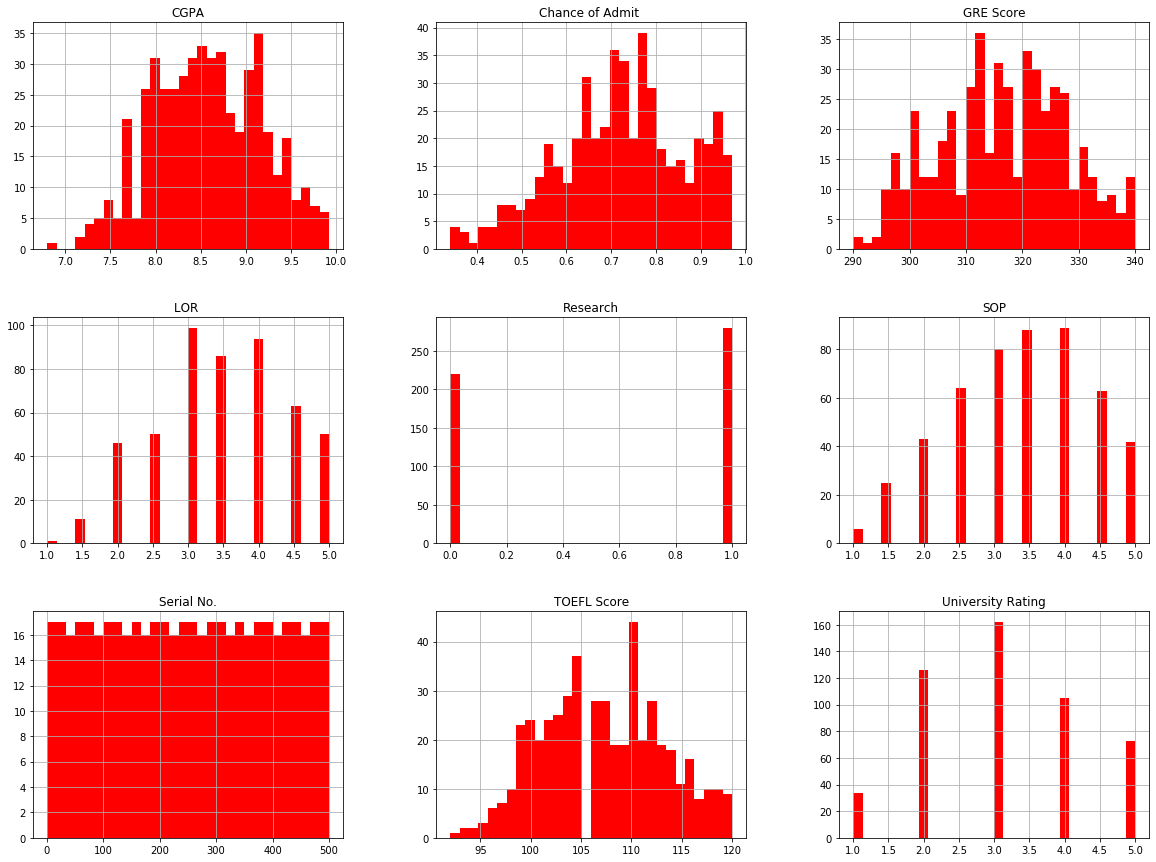

In [8]:
df.hist(bins = 30, figsize = (20, 15), color='r')

In [9]:
df=df.drop(['Serial No.'],axis=1)

In [10]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [11]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[6])], remainder = 'passthrough')
x = ct.fit_transform(x)
print(x)
x.shape

[[  0.     1.   337.   ...   4.5    4.5    9.65]
 [  0.     1.   324.   ...   4.     4.5    8.87]
 [  0.     1.   316.   ...   3.     3.5    8.  ]
 ...
 [  0.     1.   330.   ...   4.5    5.     9.56]
 [  1.     0.   312.   ...   4.     5.     8.43]
 [  1.     0.   327.   ...   4.5    4.5    9.04]]


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(500, 8)

In [13]:
# we are splitting x and y into training set and the test set
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [14]:
# creating and training the linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
accuracy_LinearRegression = lr.score(x_tr,y_tr)
accuracy_LinearRegression

0.8320945273130533

In [16]:
y_pred = lr.predict(x_te)

In [17]:
# printing the r^2 score and the erors of our trained model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(mean_absolute_error(y_te,y_pred))
mse = mean_squared_error(y_te,y_pred)
print(mse)
print(r2_score(y_te,y_pred))
print(np.sqrt(mse))

0.04825389374865483
0.004079680034602108
0.7664048993199383
0.06387237301527247


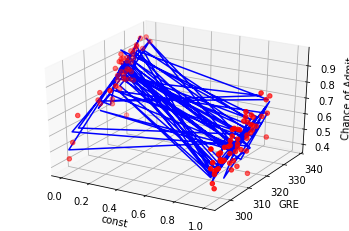

In [18]:
from mpl_toolkits import mplot3d
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(x_te[:,0],x_te[:,2],y_te,c='red')
ax.plot3D(x_te[:,0],x_te[:,2],y_pred,c='blue')

ax.set_xlabel('const')
ax.set_ylabel('GRE')
ax.set_zlabel('Chance of Admit')
plt.show()

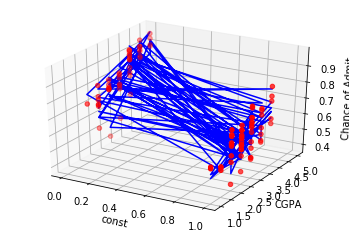

In [19]:
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(x_te[:,0],x_te[:,5],y_te,c='red')
ax.plot3D(x_te[:,0],x_te[:,5],y_pred,c='blue')

ax.set_xlabel('const')
ax.set_ylabel('CGPA')
ax.set_zlabel('Chance of Admit')
plt.show()

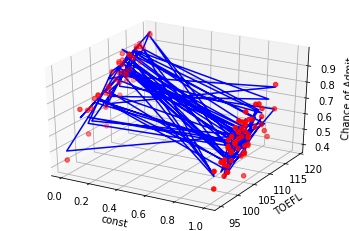

In [20]:
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(x_te[:,0],x_te[:,3],y_te,c='red')
ax.plot3D(x_te[:,0],x_te[:,3],y_pred,c='blue')

ax.set_xlabel('const')
ax.set_ylabel('TOEFL')
ax.set_zlabel('Chance of Admit')
plt.show()